In [1]:
# Visulasierung der Standorte der Messstationen des Deutschen Wetterdienstes
import sys, os
sys.path.append(os.getcwd())

import choropleth_pipeline as cp

import palettes

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

493


Text(0.5, 1.0, 'DWD-Stationen')

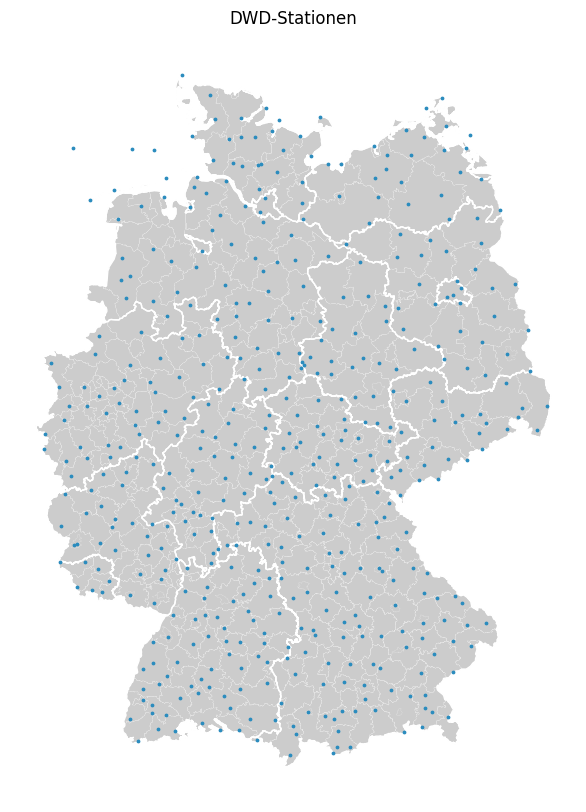

In [60]:
# Standorte laden
standorte = pd.read_csv("../data/DWDgrid/stations_locations_DWD.csv", parse_dates=["from_date","to_date"])

# filtern nach aktiven Standorten
start, end = pd.Timestamp("2024-01-01"), pd.Timestamp("2024-12-31")
mask_2024 = (standorte["from_date"].fillna(pd.Timestamp.min) <= end) & (standorte["to_date"].fillna(pd.Timestamp.max) >= start)
print(n_active_2024 := standorte.loc[mask_2024, "station_id"].nunique())

# aktive Stationen filtern
standorte_aktiv = standorte.loc[mask_2024]

# umwandeln der longitude und latitude daten in Punkte, die mit geopandas geplottet werden können
gdf = gpd.GeoDataFrame(
    standorte_aktiv,
    geometry = gpd.points_from_xy(standorte_aktiv['lon'], standorte_aktiv['lat']),
    crs = 'EPSG:4326'
)

# pfad für geometrie
VG250_GPKG = "../geometry/DE_VG250.gpkg"

# Geometriedaten
vg = cp.VG250Spec(gpkg_path=VG250_GPKG, id_col="ARS")  # id_col hier nur informativ; wir joinen manuell

# laender laden für outlines
laender = cp.load_level(vg, level = "LAN")
kreise = cp.load_level(vg, level = "KRS")

fig, ax = plt.subplots(figsize=(8, 10))

# Umrisse der Kreise plotten
kreise.boundary.plot(
    ax = ax,
    color = '#ffffff',
    facecolor = '#cccccc', #'#2B8CBE',
    linewidth=0.1,
    zorder = 1
)

# Umrisse der länder
laender.boundary.plot(
    ax = ax,
    color = '#ffffff',
    linewidth = 1,
    zorder = 2
)

# coordinate reference anpassen, damit die Punkte und Karte zusammenpassen
gdf = gdf.to_crs(kreise.crs)

# Stationen plotten 
gdf.plot(
    ax = ax,
    markersize = 3,
    color = '#2B8CBE',
    zorder = 3
)

ax.set_aspect("equal") 
ax.set_axis_off()

ax.set_title("DWD-Stationen", fontsize=12)

,station_id,from_date,to_date,elevation_m,lat,lon,name,state,access
2,44,1972-01-01,2024-12-31,44,52.9336,8.2370,Großenkneten,Niedersachsen,Frei
8,73,1953-01-01,2024-12-31,374,48.6183,13.0620,Aldersbach-Kramersepp,Bayern,Frei
9,78,1961-01-01,2024-12-31,64,52.4853,7.9125,Alfhausen,Niedersachsen,Frei
10,91,1979-01-01,2024-12-31,304,50.7446,9.3450,Alsfeld-Eifa,Hessen,Frei
12,96,2020-01-01,2024-12-31,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,Frei


In [61]:
cp.save_map(fig, filename="Messstationen_DWD.png", out_dir="exports", dpi=300)

'exports\\Messstationen_DWD.png'

In [51]:
gdf.columns

Index(['station_id', 'from_date', 'to_date', 'elevation_m', 'lat', 'lon',
       'name', 'state', 'access', 'geometry'],
      dtype='object')

In [52]:
gdf[gdf['state'] == 'Berlin'].count()

station_id     4
from_date      4
to_date        4
elevation_m    4
lat            4
lon            4
name           4
state          4
access         4
geometry       4
dtype: int64

In [53]:
landercount = gdf.groupby('state', as_index=False).agg({'station_id': 'count'}).sort_values('state')

In [54]:
landercount

,state,station_id
0,Baden-Württemberg,62
1,Bayern,104
2,Berlin,4
3,Brandenburg,25
4,Bremen,2
5,Hamburg,4
6,Hessen,35
7,Mecklenburg-Vorpommern,26
8,Niedersachsen,50
9,Nordrhein-Westfalen,42


In [62]:
landercount['station_id'].sum()

np.int64(493)